# В конце этого семинара - домашка!

# PyTorch

## __Tensors__

Одно из основных понятий в PyTorch -- это __Tenosor__. 

https://pytorch.org/docs/master/tensors.html

__Tensor__ -- это такой же массив, как и в __numpy.array__, размерность и тип данных которого мы можем задать. Tensor в отличие от numpy.array может вычисляться на __GPU__.

In [1]:
import numpy as np
# import torch
import matplotlib.pyplot as plt
import seaborn as sns

import warnings         # чтобы никто не мешал бесчинствам с кодом
warnings.filterwarnings("ignore") # обработка всевозсожных warnings путем их игнорирования

plt.style.use('ggplot')
%matplotlib inline

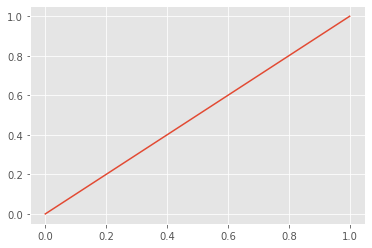

In [2]:
plt.plot([0,1], [0,1])

In [3]:
def plot(histories):
    plt.figure(figsize=(16,10))
    for name, val_loss in histories:
        plt.plot(val_loss, label=name)
    plt.legend()
    plt.show()

In [4]:
import torch


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU


# Домашние задание

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градинеты с тем, как считает PyTorch AutoGrad.

In [5]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

# Randomly initialize weights
w1_0 = torch.randn(input_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
w2_0 = torch.randn(hidden_size, output_size, device=device, dtype=dtype, requires_grad=True)

# Randomly initialize bias
b1_0 = torch.randn(batch_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
b2_0 = torch.randn(batch_size, output_size, device=device, dtype=dtype, requires_grad=True)

In [6]:
l = np.array([])
l = np.append(l, 1)
l

array([1.])

### selfmade

In [7]:
w1 = w1_0.clone()
w2 = w2_0.clone()
b1 = b1_0.clone()
b2 = b2_0.clone()
loss_self = []

In [8]:
learning_rate = 1e-4
for t in range(1001):
    # Forward pass: compute predicted y
    #TODO
    h_1 = x.mm(w1) + b1
    h_relu = h_1.clamp(min=0)
    out = h_relu.mm(w2) + b2
    
    # Compute and print loss
    loss = (out - y).pow(2).sum().item()
    
    # Backward pass: 
    dloss_dout = 2 * (out - y)
    
    grad_h_1 = dloss_dout.mm(w2.t())
    grad_h_1[h_1 < 0] = 0
    
    grad_w2 = h_relu.t().mm(dloss_dout) 
    grad_b2 = dloss_dout
    
    grad_w1 = x.t().mm(grad_h_1)
    grad_b1 = grad_h_1
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    b1 -= learning_rate * grad_b1
    b2 -= learning_rate * grad_b2
    if t % 20 == 0:
        loss_self.append(loss)
    if t % 100 == 0:
        print('Loss on iteration {} = {}'.format(t, loss))
    

Loss on iteration 0 = 358.76470947265625
Loss on iteration 100 = 121.79983520507812
Loss on iteration 200 = 106.83665466308594
Loss on iteration 300 = 100.30138397216797
Loss on iteration 400 = 95.46304321289062
Loss on iteration 500 = 91.2611083984375
Loss on iteration 600 = 87.3628921508789
Loss on iteration 700 = 83.67595672607422
Loss on iteration 800 = 80.15921020507812
Loss on iteration 900 = 76.7910385131836
Loss on iteration 1000 = 73.56005096435547


### PyTorch AutoGrad

In [9]:
w1 = w1_0
w2 = w2_0
b1 = b1_0
b2 = b2_0
loss_auto = []

In [10]:
import torch.optim as optim

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
optimizer = torch.optim.Adam([w1, w2, b1, b2], lr=learning_rate)

for t in range(1001):
    optimizer.zero_grad()
    
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2
    
    loss = loss_fn(y_pred, y)
    if t % 20 == 0:
        loss_auto.append(loss.item())
    if t % 100 == 0:
        print(t, loss.item())
    
    loss.backward()
   
    optimizer.step()

0 358.76470947265625
100 344.5483703613281
200 331.10321044921875
300 318.398193359375
400 306.322265625
500 294.83447265625
600 283.89739990234375
700 273.476806640625
800 263.543212890625
900 254.073486328125
1000 245.02890014648438


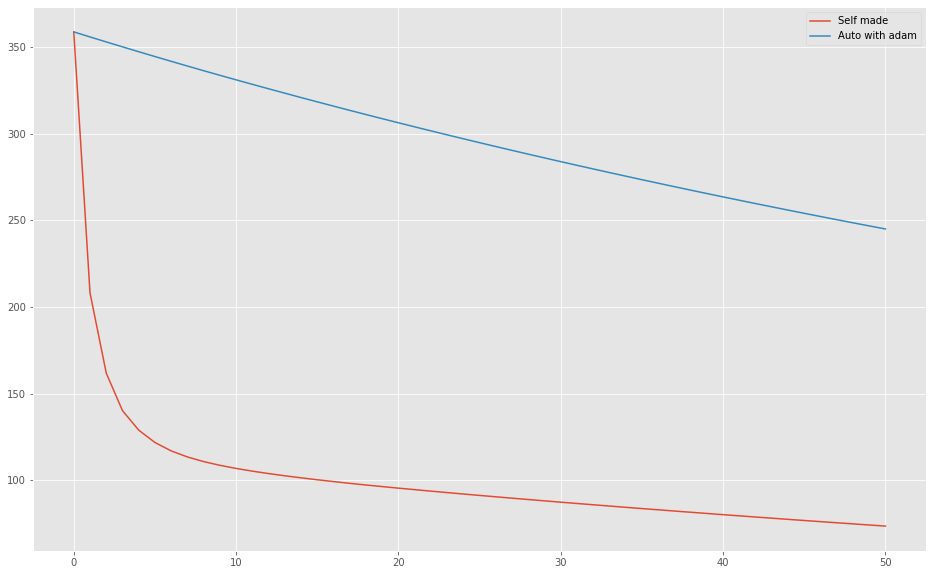

In [11]:
plot([('Self made', loss_self), 
      ('Auto with adam', loss_auto)])


В данном случае обычный градиентный спуск работает лучше Адама. В более осмыленных или сложных случаях Адам скорее всего будет лучше.